In [3]:
#### try to predict return by Regression with neural network (1 layer, no activation function)

In [42]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
start = '2020-01-01'
end = '2022-01-01'

In [44]:
data = yf.download(['BTC-USD', 'BNB-USD', 'XRP-USD', 'ETH-USD', 'ADA-USD', 'DOGE-USD'], start= start, end= end)

[*********************100%***********************]  6 of 6 completed


In [45]:
df = data.Close.copy()

In [46]:
eth = df.pop('ETH-USD')

In [47]:
df.insert(len(df.columns), 'ETH-USD', eth)

In [48]:
df = df.pct_change().dropna()

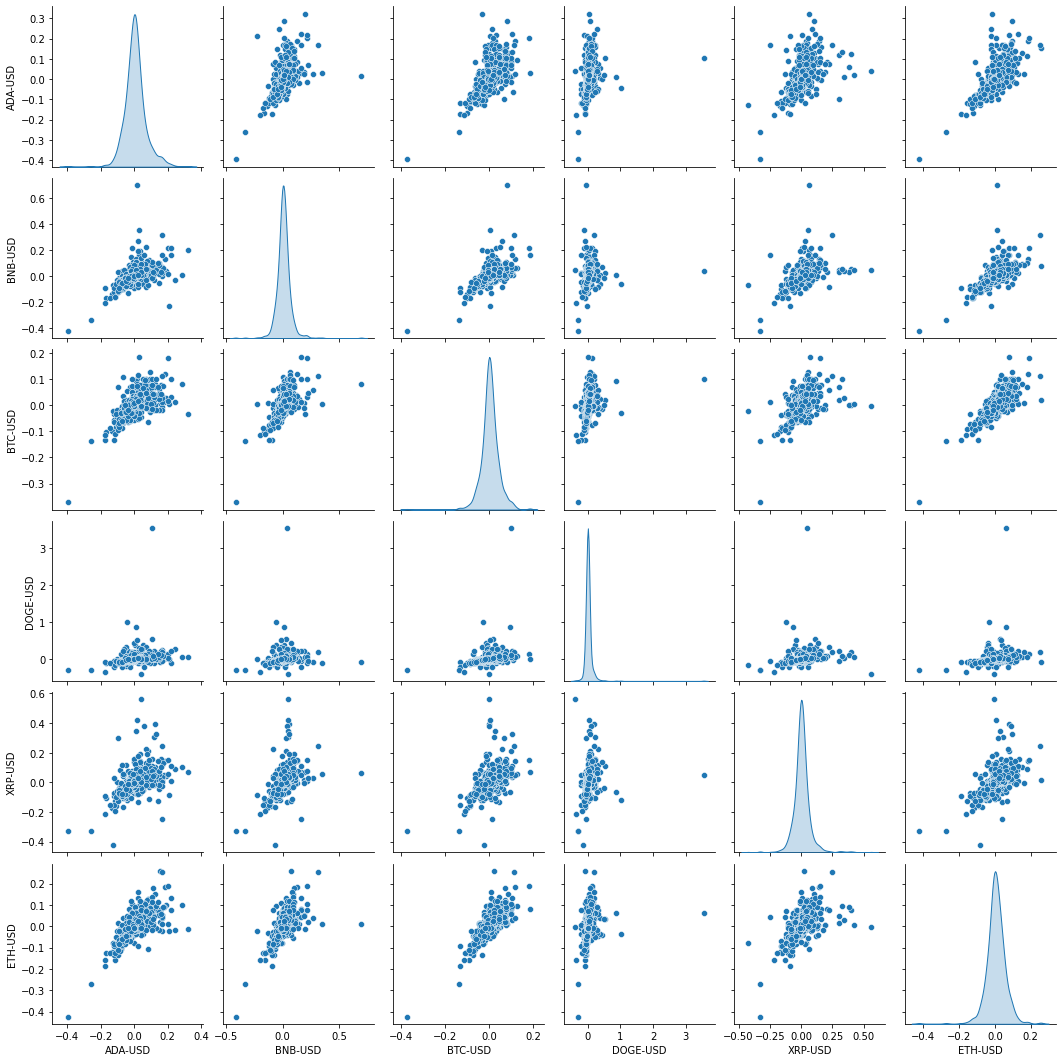

In [49]:
sns.pairplot(df, diag_kind= 'kde')
plt.show()

In [50]:
# doge have too low correlation 
### 1 try with doge, 2 dropout doge

In [51]:
## use train test split
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense

In [52]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 40)

In [54]:
model = Sequential() # initiate model
model.add(Dense(1, activation= 'relu', input_dim= 5)) # add input 5 output 1
model.add(Dense(1)) # layer1 1output

opt = tf.keras.optimizers.Adam(learning_rate= 0.005)
model.compile(
    optimizer= opt,
    loss= 'MeanSquaredError', ## use MSE because gonna do regression model
    metrics= 'acc'            # can put list for each output from multi output
)

### model 5 input, 1 layer, use Adam as optimizer and MSE as loss function

In [55]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 1)                 6         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 2         
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________


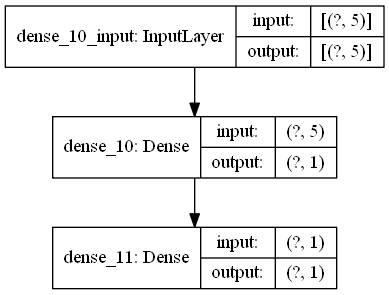

In [56]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model.plot.png', show_shapes=True, show_layer_names=True)

In [57]:
history = model.fit(X_train, y_train, epochs=100, batch_size=80, validation_split=0.2)

Epoch 1/100
6/6 [==============================] - 0s 17ms/step - loss: 0.0088 - acc: 0.0000e+00 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 2/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0057 - acc: 0.0000e+00 - val_loss: 0.0057 - val_acc: 0.0000e+00
Epoch 3/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0045 - acc: 0.0000e+00 - val_loss: 0.0047 - val_acc: 0.0000e+00
Epoch 4/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0037 - acc: 0.0000e+00 - val_loss: 0.0041 - val_acc: 0.0000e+00
Epoch 5/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0034 - acc: 0.0000e+00 - val_loss: 0.0039 - val_acc: 0.0000e+00
Epoch 6/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 0.0036 - val_acc: 0.0000e+00
Epoch 7/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0034 - val_acc: 0.0000e+00
Epoch 8/100
6/6 [=======================

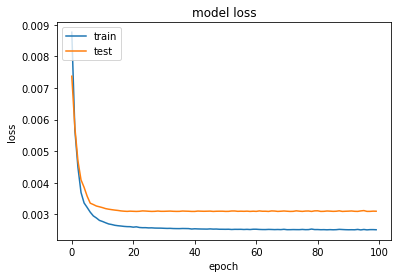

In [58]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc= 'upper left')
plt.show()

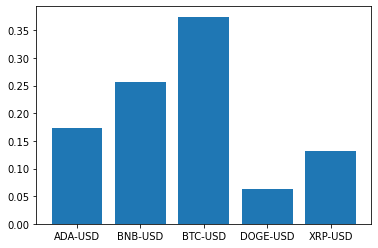

In [59]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(n_estimators=100)
gb.fit(X_train, y_train.values.ravel())
plt.bar(range(X_train.shape[1]), gb.feature_importances_)
plt.xticks(range(X_train.shape[1]), X_train.columns) #['AT','V','AP','RH'])
plt.show()

In [60]:
y_pred = model.predict(X_test)

In [61]:
model.evaluate(X_test,y_test)

5/5 [==============================] - 0s 606us/step - loss: 0.0034 - acc: 0.0000e+00


[0.0033753952011466026, 0.0]

In [62]:
compare = pd.DataFrame(y_test)

In [63]:
compare['y_pred'] = y_pred

In [64]:
((compare['y_pred'] * compare['ETH-USD']) > 0).sum()

73

In [65]:
compare

,ETH-USD,y_pred
Date,,
2020-04-30,-0.043168,0.007264
2021-05-13,-0.018675,0.007264
2021-03-26,0.067372,0.007264
2021-07-10,-0.016439,0.007264
2020-07-07,-0.010081,0.007264
...,...,...
2021-02-27,0.009640,0.007264
2020-05-20,-0.015715,0.007264
2020-03-03,-0.026413,0.007264


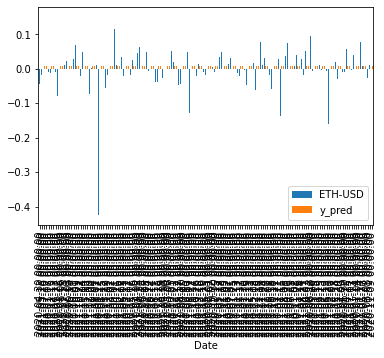

In [66]:
compare.plot(kind= 'bar')
plt.show()

In [315]:
X_train.columns

Index(['ADA-USD', 'BNB-USD', 'BTC-USD', 'DOGE-USD', 'XRP-USD'], dtype='object')

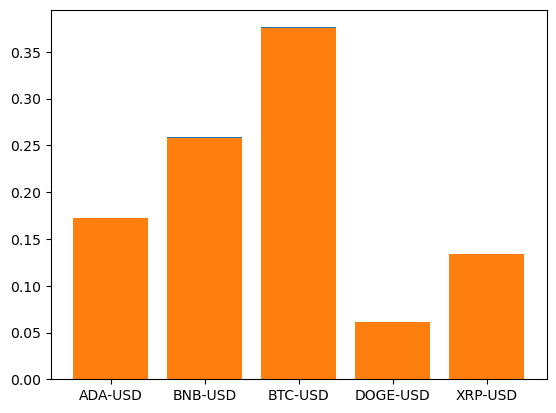